<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Leonardo Péricles (UP) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pelo candidato Leonardo Péricles do partido UP, do qual pode ser visualizado clicando <a href="https://divulgacandcontas.tse.jus.br/candidaturas/oficial/2022/BR/BR/544/candidatos/884623/PROPOSTAS.pdf">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = '../PlanosPDF/PLANOUP.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'Author': 'Leonardo Peres',
 'Creator': 'Microsoft® Word 2019',
 'CreationDate': "D:20220802215147-03'00'",
 'ModDate': "D:20220802215147-03'00'",
 'Producer': 'Microsoft® Word 2019'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

12

In [7]:
# Página 1
pdf.pages[0].extract_text()

' \nO documento com a proposta de governo apresentado pela candidatura Leonardo Péricles e Samara \nMartins é derivado do debate em torno do programa nacional do Partido Unidade Popular, aprovado no \nacúmulo de seus dois congressos subsequentes (2019 e 2021). Isso significa que traz o acúmulo da \nexperiência do socialismo em diversos países ao longo do século XX e também das soluções aplicadas \nna resistência social do povo trabalhador brasileiro nas diversas etapas da sociedade de classes que se \ninstaurou a 522 anos, passando por 400 anos de escravidão (indígena e negra) ao atual regime de \ntrabalho assalariado. \n \nPara maior aprofundamento de nossa análise sobre a formação econômica, política e social do Brasil \nacesse adquira o texto completo da Resolução Política e Programa entrando em contato pelo site \nunidadepopular.org.br.  \n \nReforçamos que as diretrizes aqui expostas devem ser aplicadas sobre o critério da prática social, com \npermanente acúmulo e adaptação às co

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

 
-  Universalizar  a  assistência  técnica  e  extensão  rural,  capacitação  aos  agricultores(as)  na 
perspectiva agroecológica, crédito e políticas de comercialização para as famílias assentadas e 
pequenos proprietários(as) rurais; 
7. Anulação dos impostos extorsivos cobrados do povo; imposto sobre as grandes fortunas e 
progressivo. Quem ganha mais, paga mais; 
 
-  Taxação de grandes fortunas e reforma tributária popular; reduzir fortemente a carga de impostos 
indiretos que atingem a população em geral, criar ou aumentar sobre grandes propriedades, 
lucros e dividendos e rever a política do imposto sobre circulação de mercadoria - ICMS - que 
taxa por igual ricos e pobres. Reestruturar, de forma progressiva, as alíquotas de imposto de 
renda, aumentando a faixa de isenção da maior parte das famílias pobres da imposição do 
imposto de renda, com elevação do piso, e aumentar a alíquota de milionários e bilionários. 
 
 
8. Estatização de todos os meios de transporte coletivo; 


## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

 
O d


## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

 
o documento com a proposta de governo apresentado pela candidatura leonardo péricles e samara 
martins é derivado do debate em torno do programa nacional do partido unidade popular, aprovado no 
acúmulo de seus dois congressos subsequentes (2019 e 2021). isso significa que traz o acúmulo da 
experiência do socialismo em diversos países ao longo do século xx e também das soluções aplicadas 
na resistência social do povo trabalhador brasileiro nas diversas etapas da sociedade de classes que se 
instaurou a 522 anos, passando por 400 anos de escravidão (indígena e negra) ao atual regime de 
trabalho assalariado. 
 
para maior aprofundamento de nossa análise sobre a formação econômica, política e social do brasil 
acesse adquira o texto completo da resolução política e programa entrando em contato pelo site 
unidadepopular.org.br.  
 
reforçamos que as diretrizes aqui expostas devem ser aplicadas sobre o critério da prática social, com 
permanente acúmulo e adaptação às condições vigente

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

 
o documento com a proposta de governo apresentado pela candidatura leonardo péricles e samara 
martins é derivado do debate em torno do programa nacional do partido unidade popular  aprovado no 
acúmulo de seus dois congressos subsequentes  2019 e 2021  isso significa que traz o acúmulo da 
experiência do socialismo em diversos países ao longo do século xx e também das soluções aplicadas 
na resistência social do povo trabalhador brasileiro nas diversas etapas da sociedade de classes que se 
instaurou a 522 anos  passando por 400 anos de escravidão  indígena e negra  ao atual regime de 
trabalho assalariado  
 
para maior aprofundamento de nossa análise sobre a formação econômica  política e social do brasil 
acesse adquira o texto completo da resolução política e programa entrando em contato pelo site 
unidadepopular org br   
 
reforçamos que as diretrizes aqui expostas devem ser aplicadas sobre o critério da prática social  com 
permanente acúmulo e adaptação às condições vigentes

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['o', 'documento', 'com', 'a', 'proposta']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['documento', 'proposta', 'governo', 'apresentado', 'candidatura']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('nacional', 21),
 ('popular', 20),
 ('garantia', 20),
 ('população', 19),
 ('educação', 19),
 ('escola', 19),
 ('ensino', 18),
 ('reforma', 17),
 ('controle', 17),
 ('todos', 17),
 ('social', 16),
 ('política', 16),
 ('trabalho', 15),
 ('fim', 15),
 ('povo', 14),
 ('escolas', 14),
 ('processo', 13),
 ('país', 13),
 ('médio', 13),
 ('sobre', 12),
 ('saúde', 12),
 ('pública', 11),
 ('lei', 11),
 ('programa', 10),
 ('público', 10),
 ('escolar', 10),
 ('poder', 9),
 ('acesso', 9),
 ('governo', 8),
 ('anos', 8)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,nacional,21
1,popular,20
2,garantia,20
3,população,19
4,educação,19


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

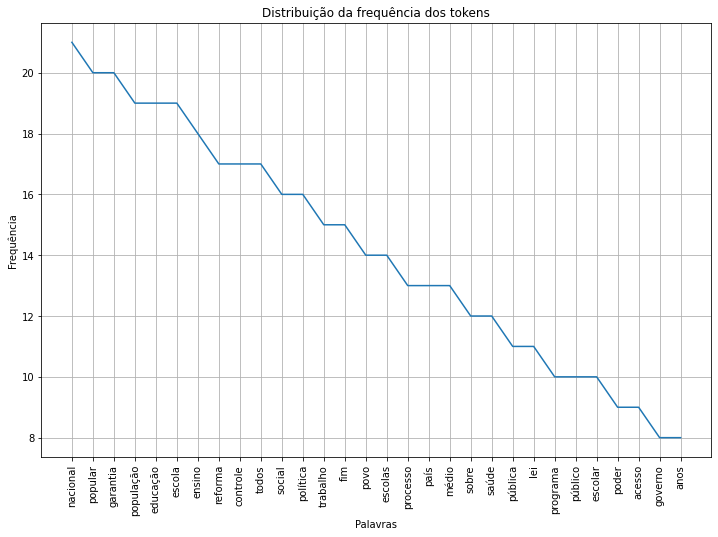

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

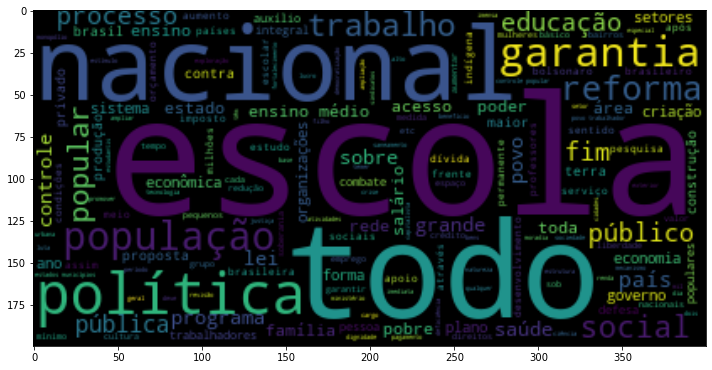

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022